<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_prediction_dataset.xlsx to loan_approval_prediction_dataset.xlsx


In [7]:
loan_approval_prediction_dataset = "loan_approval_prediction_dataset.xlsx"
# Read the Excel file into a pandas DataFrame
data = pd.read_excel(loan_approval_prediction_dataset)

# Display the DataFrame
print(data.shape)
print(data.head())

(614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2         

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = imputer.fit_transform(data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


In [11]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [12]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])


In [13]:
# Scale/normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']])

In [14]:
# Summary statistics
print(data.describe())


           Gender     Married   Education  ApplicantIncome  CoapplicantIncome  \
count  614.000000  614.000000  614.000000     6.140000e+02       6.140000e+02   
mean     0.838762    0.657980    0.218241    -4.339634e-18       4.050325e-17   
std      0.421752    0.484971    0.413389     1.000815e+00       1.000815e+00   
min      0.000000    0.000000    0.000000    -8.606493e-01      -5.544873e-01   
25%      1.000000    0.000000    0.000000    -4.138159e-01      -5.544873e-01   
50%      1.000000    1.000000    0.000000    -2.606393e-01      -1.480047e-01   
75%      1.000000    1.000000    0.000000     6.414426e-02       2.312023e-01   
max      2.000000    2.000000    1.000000     1.238462e+01       1.369617e+01   

         LoanAmount  Loan_Amount_Term  Credit_History  
count  6.140000e+02        614.000000      614.000000  
mean   5.786179e-18        342.000000        0.842199  
std    1.000815e+00         64.372489        0.349681  
min   -1.636463e+00         12.000000        0

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,No,0.072991,-0.554487,0.000000,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,No,-0.134412,-0.038732,-0.219273,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,Yes,-0.393747,-0.554487,-0.957641,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,No,-0.462062,0.251980,-0.314547,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,No,0.097728,-0.554487,-0.064454,360.0,1.0,Urban,Y


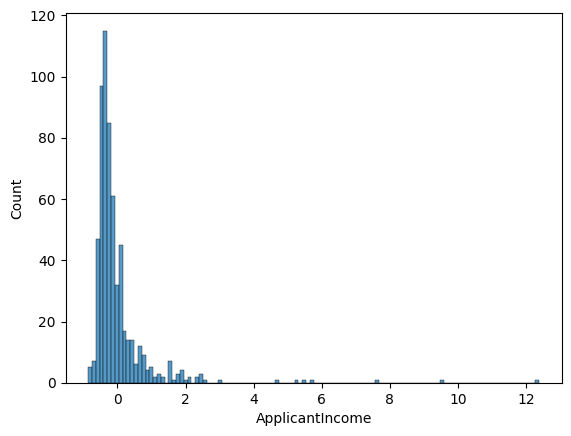

In [33]:
# Distribution plots
sns.histplot(data['ApplicantIncome'])
plt.show()

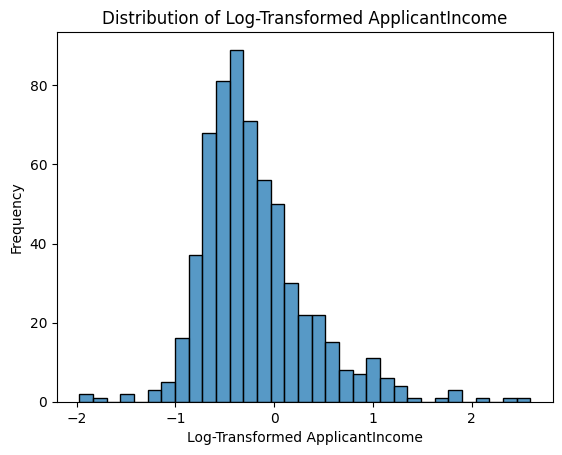

In [30]:
# Apply log transformation to ApplicantIncome to reduce skewness
# Add 1 to the scaled ApplicantIncome to handle potential non-positive values
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'] + 1)

# Plot the histogram of the transformed data
sns.histplot(data['ApplicantIncome_log'])
plt.title('Distribution of Log-Transformed ApplicantIncome')
plt.xlabel('Log-Transformed ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of 'ApplicantIncome'.

**Explanation of the Original Histogram (in cell `vRYf84NuD3fr`):**

*   The x-axis represents the 'ApplicantIncome' values.
*   The y-axis represents the frequency or count of applicants within each income range.
*   The histogram is heavily **skewed to the right**, meaning most applicants have lower incomes and a few have very high incomes.

**Explanation of the Log-Transformed Histogram (in cell `08bb7f43`):**

*   This histogram shows the distribution of the log-transformed 'ApplicantIncome' values.
*   By applying a log transformation (specifically `np.log(data['ApplicantIncome'] + 1)`), we have reduced the skewness.
*   The distribution is now much more symmetrical and closer to a normal distribution.

**Problem and Correction:**

The heavy right skew in the original histogram is a problem because many statistical models assume normally distributed data. This skewness can negatively impact model performance. The log transformation is a common technique to correct this issue by compressing the larger values and expanding the smaller values, resulting in a more balanced distribution.

In [34]:
# Correlation analysis
# Drop the 'Loan_ID' column as it is not numerical and not relevant for correlation analysis
# Replace '3+' with 3 and convert 'Dependents' to numeric
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)
# Encode remaining categorical variables
data = pd.get_dummies(data, columns=['Self_Employed', 'Property_Area'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
corr_matrix = data.drop('Loan_ID', axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

KeyError: "None of [Index(['Self_Employed', 'Property_Area'], dtype='object')] are in the [columns]"

In [21]:
# Calculate loan approval rate
approval_rate = data['Loan_Status'].value_counts(normalize=True)
print(approval_rate)

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64


The following cells explore the relationships between different features and their impact on loan approval status. Specifically, we look at the correlation between income and loan amounts and examine how credit history affects loan approval rates.

In [22]:
# Analyze income and loan amount
print(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr())

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.565620
CoapplicantIncome        -0.116605           1.000000    0.187828
LoanAmount                0.565620           0.187828    1.000000


In [23]:
# Examine credit history impact
print(data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True))

Credit_History  Loan_Status
0.000000        0              0.921348
                1              0.078652
0.842199        1              0.740000
                0              0.260000
1.000000        1              0.795789
                0              0.204211
Name: proportion, dtype: float64


In [25]:
# Calculate the count of each Property Area and Loan Status combination
property_area_loan_status = data.melt(id_vars=['Loan_Status'],
                                      value_vars=['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'],
                                      var_name='Property_Area',
                                      value_name='Is_Area').loc[lambda x: x['Is_Area'] == True].groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = property_area_loan_status.pivot(index='Property_Area', columns='Loan_Status', values='Count')

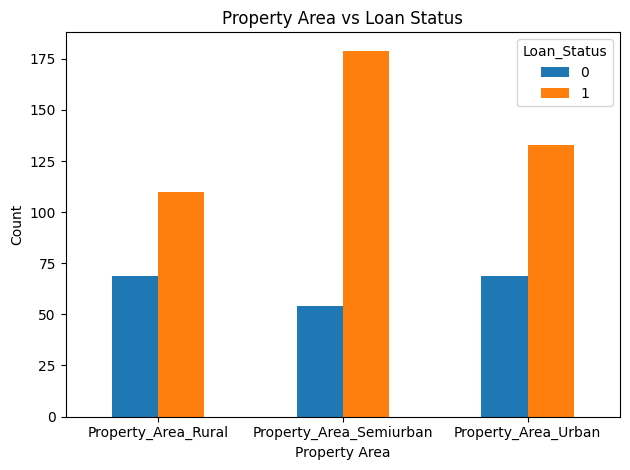

In [27]:
# Plot a bar chart
pivot_data.plot(kind='bar')
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Loan Approval Rates by Property Area**

*   **Rural:** 110 approved. (69 rejected + 110 approved) = 110 / 179 ≈ 0.615

*   **Semiurban:** 179 approved. (54 rejected + 179 approved) = 179 / 233 ≈ 0.768
*   **Urban:** 133 approved. (69 rejected + 133 approved) = 133 / 202 ≈ 0.658

Key Findings:
1.   Semiurban: ≈ 0.768
2.   Urban: ≈ 0.658
3.   Rural: ≈ 0.615

   The **Semiurban** property area has the highest loan approval rate.
   
Both the **Rural** and **Urban** areas have lower approval rates compared to Semiurban. Rural has the lowest approval rate among the three.

In [35]:
# Split data
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Impute missing values in X_train and X_test
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


logreg.fit(X_train_imputed, y_train)
y_pred_logreg = logreg.predict(X_test_imputed)

In [39]:
# Evaluate models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Logistic Regression Hyperparameter Tuning
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], # Use a solver that supports both l1 and l2
    'max_iter': [500, 1000, 2000]
}

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_imputed, y_train)

print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression Best Score:", logreg_grid.best_score_)

Logistic Regression Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best Score: 0.8145949288806431


In [46]:
# Logistic Regression Feature Importance
logreg_best = logreg_grid.best_estimator_
logreg_coefs = logreg_best.coef_[0]
feature_importance_logreg = pd.DataFrame({'Feature': X_train.columns, 'Importance': logreg_coefs})
feature_importance_logreg = feature_importance_logreg.sort_values(by='Importance', ascending=False)
print("Logistic Regression Feature Importance:")
print(feature_importance_logreg)

Logistic Regression Feature Importance:
                    Feature  Importance
8            Credit_History    2.228197
12  Property_Area_Semiurban    0.192135
0                    Gender    0.000000
3                 Education    0.000000
4           ApplicantIncome    0.000000
1                   Married    0.000000
2                Dependents    0.000000
13      Property_Area_Urban    0.000000
6                LoanAmount    0.000000
10        Self_Employed_Yes    0.000000
9          Self_Employed_No    0.000000
14      ApplicantIncome_log    0.000000
11      Property_Area_Rural    0.000000
7          Loan_Amount_Term   -0.003020
5         CoapplicantIncome   -0.058442


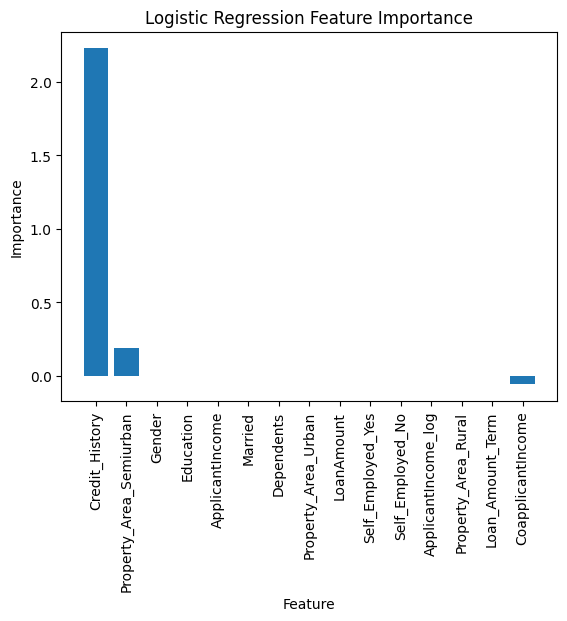

In [48]:
# Logistic Regression Feature Importance Plot
plt.bar(feature_importance_logreg['Feature'], feature_importance_logreg['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importance')
plt.xticks(rotation=90)
plt.show()

**The feature importance analysis reveals that:**

1. **Credit_History** is the most important feature, with a significant impact on loan status.
2. **Property_Area_Semiurban** is also an important feature, indicating that location plays a role in loan approval.
3. Other features have relatively low or zero importance, suggesting they may be less influential or correlated with other features. This doesn't necessarily mean these features are irrelevant in reality, but in this specific linear model, their direct linear relationship with the target is weak.


In [40]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [42]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_rf))


Random Forest:
Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
[[18 25]
 [ 2 78]]


In [45]:
# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Best Score: 0.8165739022881879


In [47]:
# Random Forest Feature Importance
rf_best = rf_grid.best_estimator_
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_best.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_rf)

Random Forest Feature Importance:
                    Feature  Importance
8            Credit_History    0.326050
4           ApplicantIncome    0.121049
14      ApplicantIncome_log    0.120511
6                LoanAmount    0.118673
5         CoapplicantIncome    0.087472
7          Loan_Amount_Term    0.053044
2                Dependents    0.037025
0                    Gender    0.025532
1                   Married    0.023266
12  Property_Area_Semiurban    0.021737
11      Property_Area_Rural    0.019266
3                 Education    0.015769
13      Property_Area_Urban    0.012497
9          Self_Employed_No    0.010609
10        Self_Employed_Yes    0.007500


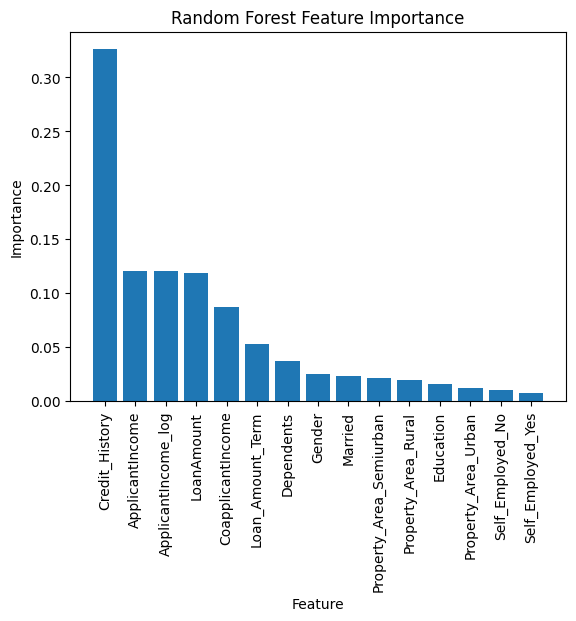

In [49]:
# Random Forest Feature Importance Plot
plt.bar(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

The feature importance analysis shows that:


*    Credit_History is the most important feature (32.6%), indicating its strong influence on loan status.
*   ApplicantIncome and ApplicantIncome_log are also significant features (12.1% and 12.1%), suggesting income plays a crucial role.
*    LoanAmount and CoapplicantIncome contribute moderately (11.9% and 8.7%).
*   Other features have relatively lower importance, but still contribute to the model's predictions.

This analysis highlights the key drivers of loan status in the Random Forest model.